# <center>Data analysis and visualization of unstructured model grids with psyplot</center>

<div>
    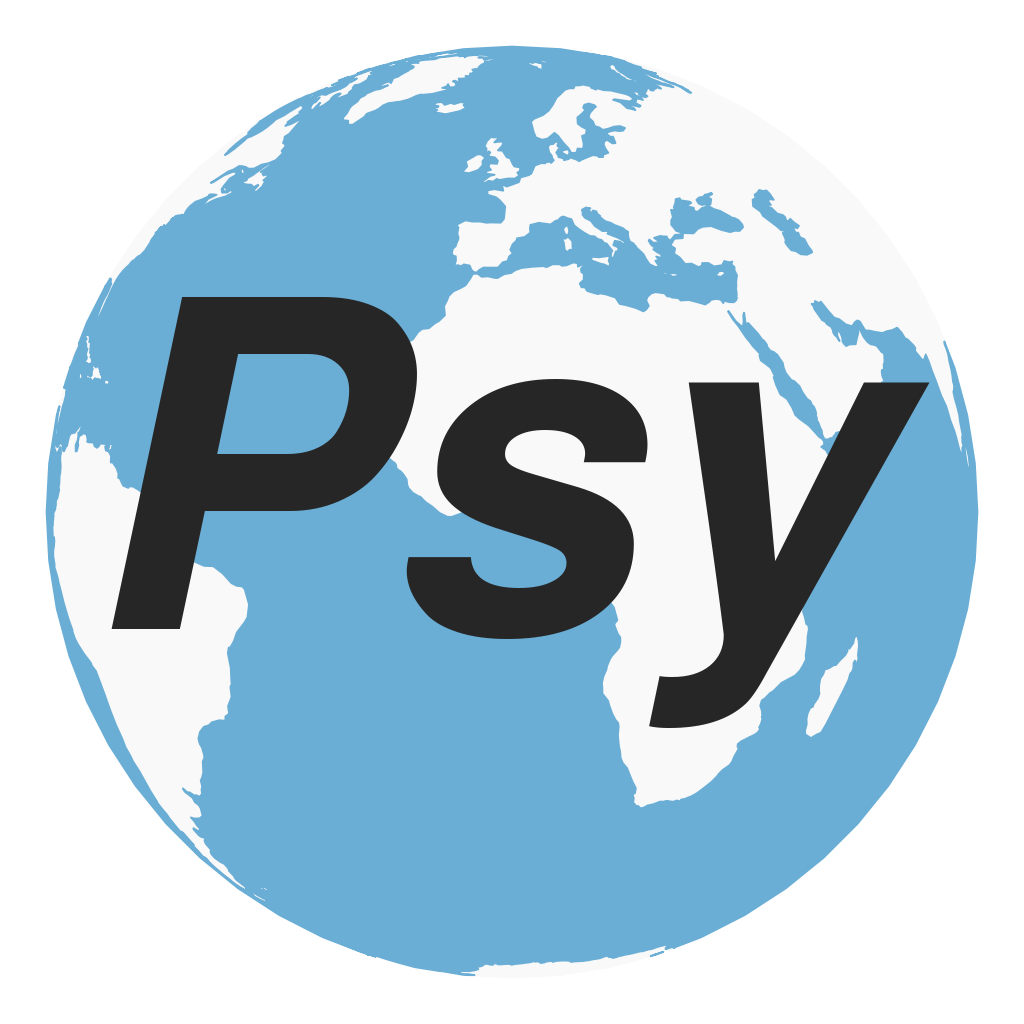
</div>

## KS Seminar

Philipp S. Sommer

Helmholtz-Zentrum Geesthacht

Helmholtz Coastal Data Center

February 24th, 2021

[Help](#/2/0)

## Technical Note <a id='help'></a>

This presentation is a jupyter notebook presented with [rise][rise] for interactive execution of the cells.
You can run it interactively on mybinder in your browser: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Chilipp/psyplot-KS-Seminar-20210228/main?filepath=psyplot-framework-presentation.ipynb)

The link to the repo on Github (https://github.com/Chilipp/psyplot-O2A-Jourfix-20210224) will be put onto the confluence page.

[Back to first slide](#/0/0)

[rise]: https://rise.readthedocs.io

So let's import some libraries for the execution

In [1]:
%matplotlib widget

import psyplot.project as psy

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from IPython.display import display, Video, YouTubeVideo

from ipympl.backend_nbagg import Canvas
Canvas.header_visible.default_value = False

import warnings
warnings.filterwarnings("ignore", r"\s*The on_mappable_changed")
warnings.filterwarnings("ignore", r"\s*The input coordinates")
warnings.filterwarnings("ignore", r"\s*shading=")
warnings.filterwarnings("ignore", r"\s*\[Warning by")

## Outline

#### Motivation for psyplot

#### Main features of psyplot

#### Overview on unstructured grids

#### How to use and extend the framework

#### Some more features of psyplot

#### Features under development

### Note:

I am not a visualization expert

The aim of this talk is not to show wonderful plots, but rather how to generate them. 

You can always make them publication-ready using the rich features of matplotlib.

## Last notes before I start

- psyplot has been just a side project during my master and PhD. 
- Since December 2019 I work as a Data Scientist at the HZG and can invest more time into it

But I am really looking forward to gain more contributors to the software!

[#imnotontwitter](https://psyplot.github.io/#get-in-touch) but I am pretty responsive via 
- github
- the new psyplot mailing list
- the new community channel on gitter
- via mail

https://psyplot.github.io/#get-in-touch

**Please cite the software you are using.**

Not only psyplot (see [here][citation]). We do put a lot of effort into making our software sustainable and open-source, so please acknowledge it if you use it for your analysis.

[citation]: https://psyplot.readthedocs.io/en/latest/#how-to-cite-psyplot

## It's all about a quick look into the data

<table>
    <tr>
        <th>ncview</th>
        <th>ArcGIS</th>
    </tr>
    <tr>
        <td>
            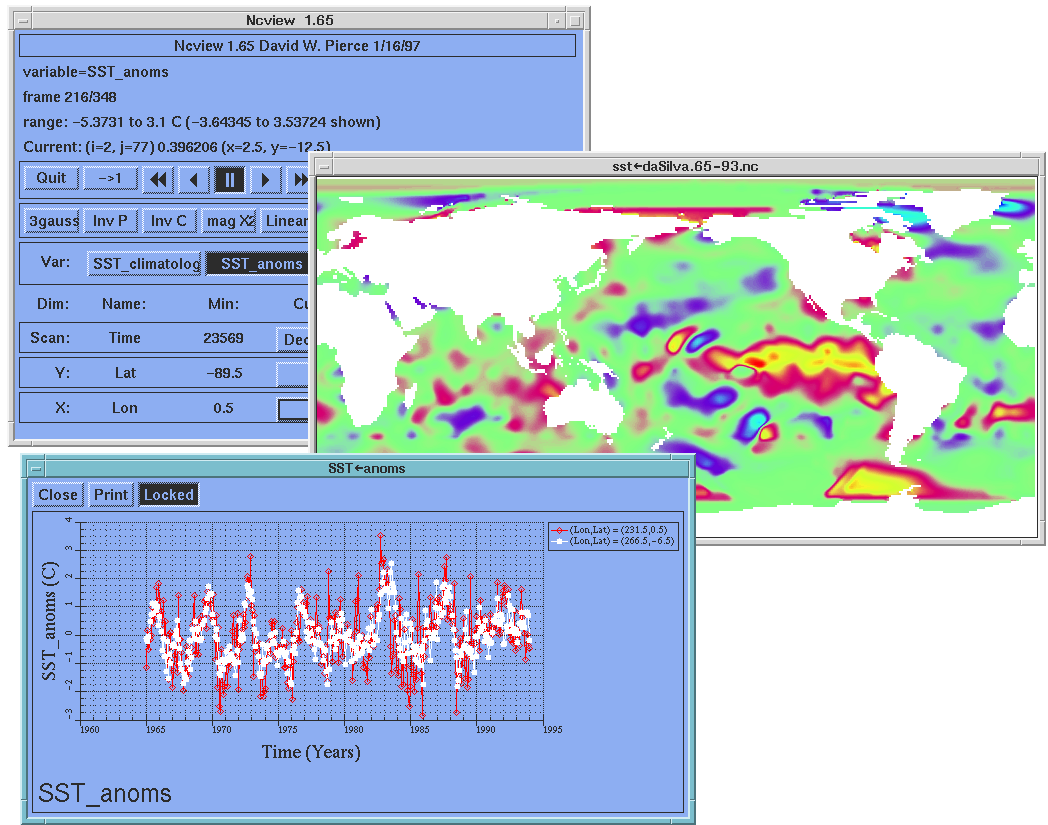
        </td>
        <td>
            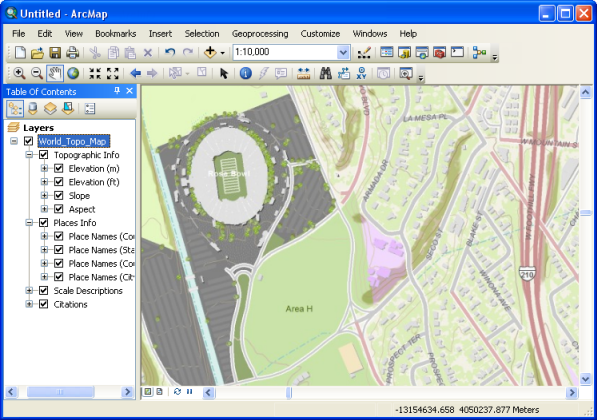
        </td>
    </tr>
    <tr>
        <th>Panoply</th>
        <th>Paraview</th>
    </tr>
    <tr>
        <td>
            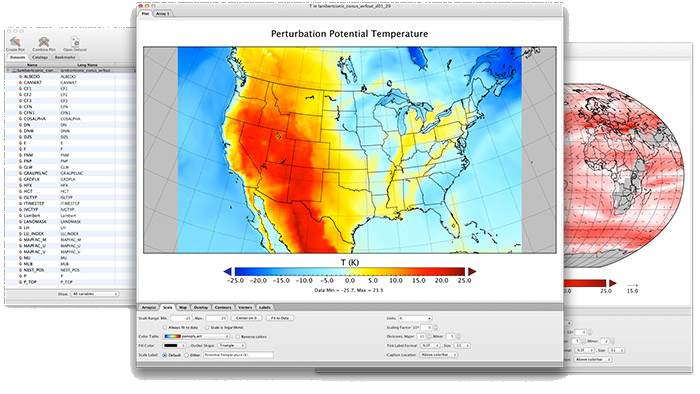
        </td>
        <td>
            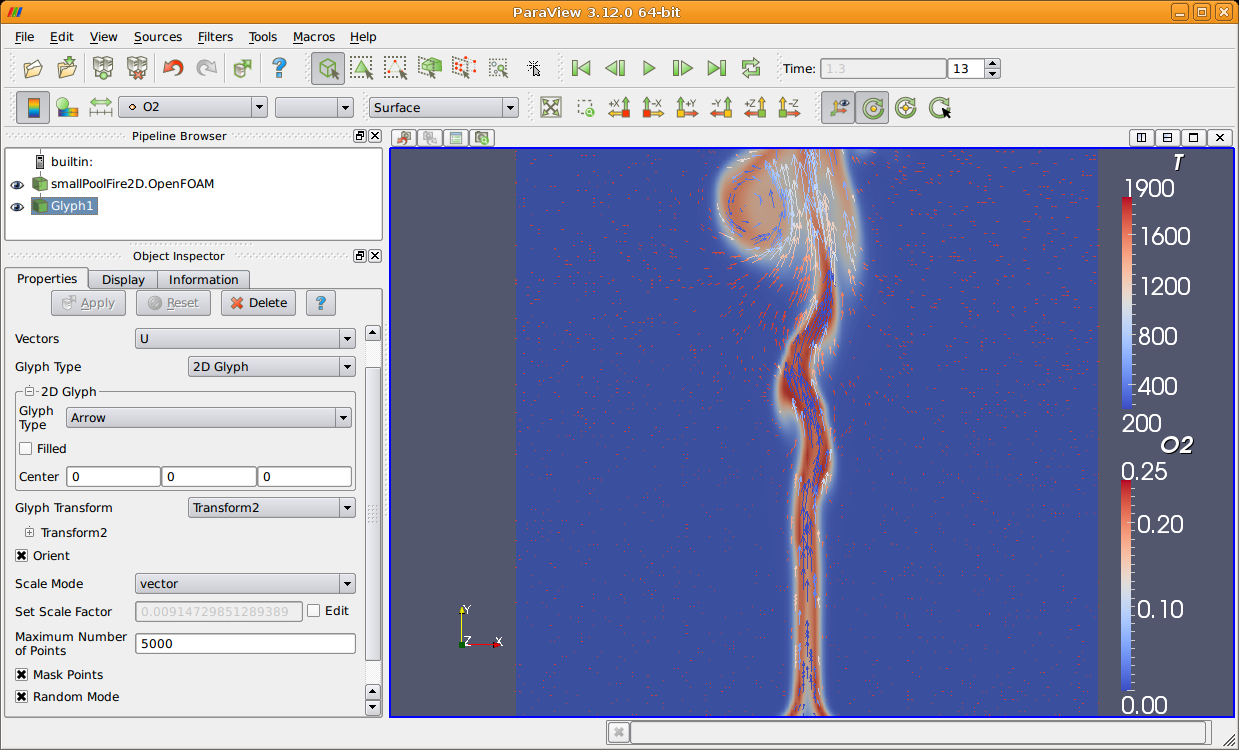
        </td>
    </tr>
</table>
    



Current tools either focus on

- Data visualization (ncview, Panoply, Paraview, etc.)
- data processing (Python, R)

There is no solution available that

- Is (easily) scriptable
- And has a Graphical User Interface
- Treats data processing and visualization hand in hand

<h2 class="section-heading">psyplot at a glance</h2>

## Using the GUI

psyplot comes with a flexible graphical user interface (GUI).

- On mybinder: click [here](../desktop).
- On mistral:
  
  - either via X11
      ```bash
      ssh -X mistral
      module load python3
      psyplot
      ```
  - or [via remote desktop][remote-mistral]
- On your on own working station: Install it via `conda install -c conda-forge psy-view`

  
  
[remote-mistral]: https://www.dkrz.de/up/services/analysis/visualization/visualization-on-mistral

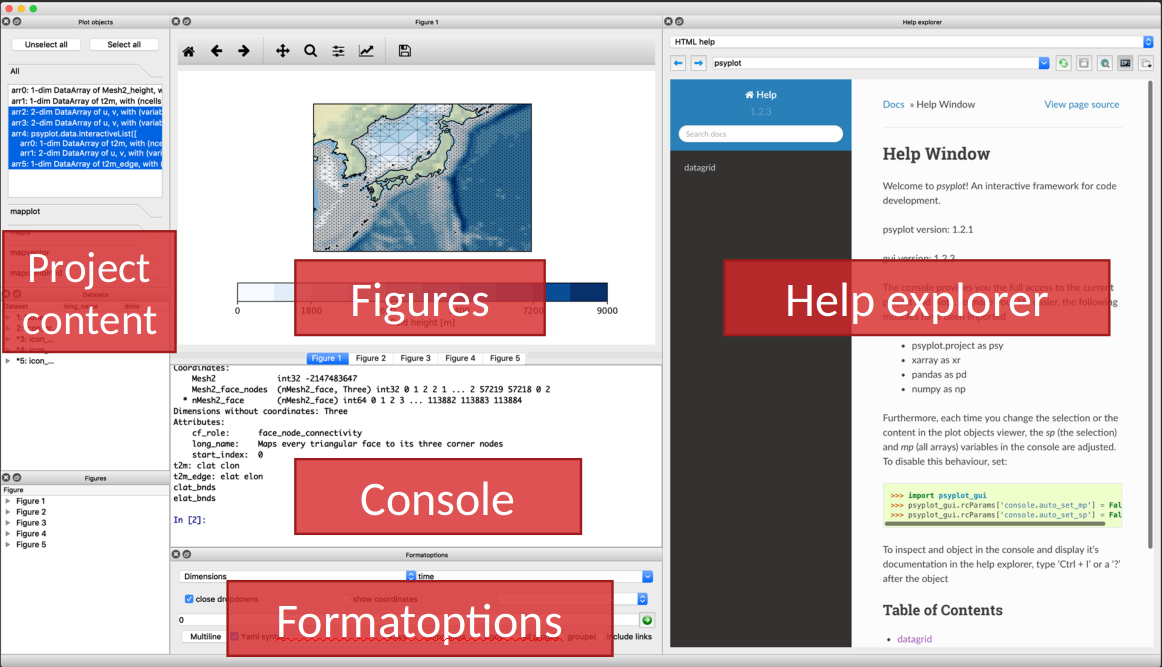

## Using psyplot from Python

In [2]:
ds = psy.open_dataset("data/icon_grid_demo.nc")
ds

<xarray.Dataset>
Dimensions:    (edge: 480, lev: 4, ncells: 5120, no: 4, time: 5, vertices: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-31T18:00:00 ... 1979-05-31T18:00:00
    clon       (ncells) float64 ...
    clon_bnds  (ncells, vertices) float64 ...
    clat       (ncells) float64 ...
    clat_bnds  (ncells, vertices) float64 ...
    elon       (edge) float32 ...
    elon_bnds  (edge, no) float32 ...
    elat       (edge) float32 ...
    elat_bnds  (edge, no) float32 ...
  * lev        (lev) float64 1e+05 8.5e+04 5e+04 2e+04
Dimensions without coordinates: edge, ncells, no, vertices
Data variables:
    t2m        (time, lev, ncells) float32 ...
    u          (time, lev, ncells) float32 ...
    v          (time, lev, ncells) float32 ...
    t2m_edge   (time, lev, edge) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.1 (http://mpimet...
    Conventions:          CF-1.4
    history:              Thu Aug 30 21:54:23 2018: cdo delname,t2m_2d,u_2d,v...
    number_of_grid_used:  42
    uuidOfHGrid:          bf575ad8-daa6-11e7-a4a9-93d511f821b4
    title:                Temperature and Wind demo-File for python nc2map mo...
    CDO:                  Climate Data Operators version 1.9.1 (http://mpimet...

In [3]:
sp = ds.psy.plot.mapplot(
    name="t2m",
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Working interactively from the command line

In [4]:
sp = ds.psy.plot.mapplot(
    name="t2m", cmap="Blues",
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
sp.update(cmap="Reds")

In [6]:
sp.update(title="%(time)s")

In [7]:
sp.update(time=3)

In [8]:
sp.update(lonlatbox="Europe")

In [9]:
psy.close("all")

<h2 class="section-heading">Grid types</h2>

## Starting simple: Rectilinear

- Standard lat-lon file
- 2D array with 1D coordinates
- Grid cell boundaries are not part of the file
  - xarray (and psyplot) interpolate them
  - matplotlib, too ([since 3.3.0][changelog])

<dl>
    <dt style="clear: left;">xarray</dt>
    <dd><code>ds.t2m.plot()</code></dd>
    <dt style="clear: left;">psyplot</dt>
    <dd><code>ds.t2m.psy.plot.mapplot()</code></dd>
    <dt style="clear: left;">matplotlib</dt>
    <dd><code>plt.pcolormesh(ds.lon, ds.lat, ds.t2m)</code></dd>
</dl>

[changelog]: https://matplotlib.org/3.3.1/users/whats_new.html#pcolor-and-pcolormesh-now-accept-shading-nearest-and-auto

In [10]:
with xr.open_dataset("data/rectilinear.nc") as ds:
    display(ds)

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 192)
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Data variables:
    t2m      (lat, lon) float32 ...

## Getting more complex: Curvilinear

- 2D variable
- 2D coordinates

---
- Eventually 3D bounds variable

---
not (well) supported by standard matplotlib and cartopy approach

In [11]:
with psy.open_dataset("data/curvilinear.nc") as ds:
    display(ds)

<xarray.Dataset>
Dimensions:   (i: 256, j: 220, vertices: 4)
Coordinates:
    lon       (j, i) float32 ...
    lon_bnds  (j, i, vertices) float32 ...
    lat       (j, i) float32 ...
    lat_bnds  (j, i, vertices) float32 ...
Dimensions without coordinates: i, j, vertices
Data variables:
    t2m       (j, i) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Nov 15 13:44:16 2020: cdo ifthen tmp.nc -remapcon,tmp.n...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

## Visualizing The MPI-OM

2D coordinates

In [12]:
ds.psy.plot.mapplot(
    map_extent="United Kingdom|Italy",
    stock_img=True,
    datagrid='k-', plot=None
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

psyplot.project.Project([    arr0: 2-dim DataArray of t2m, with (j, i)=(220, 256), ])

In [13]:
plt.close('all')
psy.close('all')

## Unstructured Data: ICON

- 1D variables
- 1D coordinates

---
- 2D bounds variable

--- 
not supported by standard matplotlib and cartopy approach

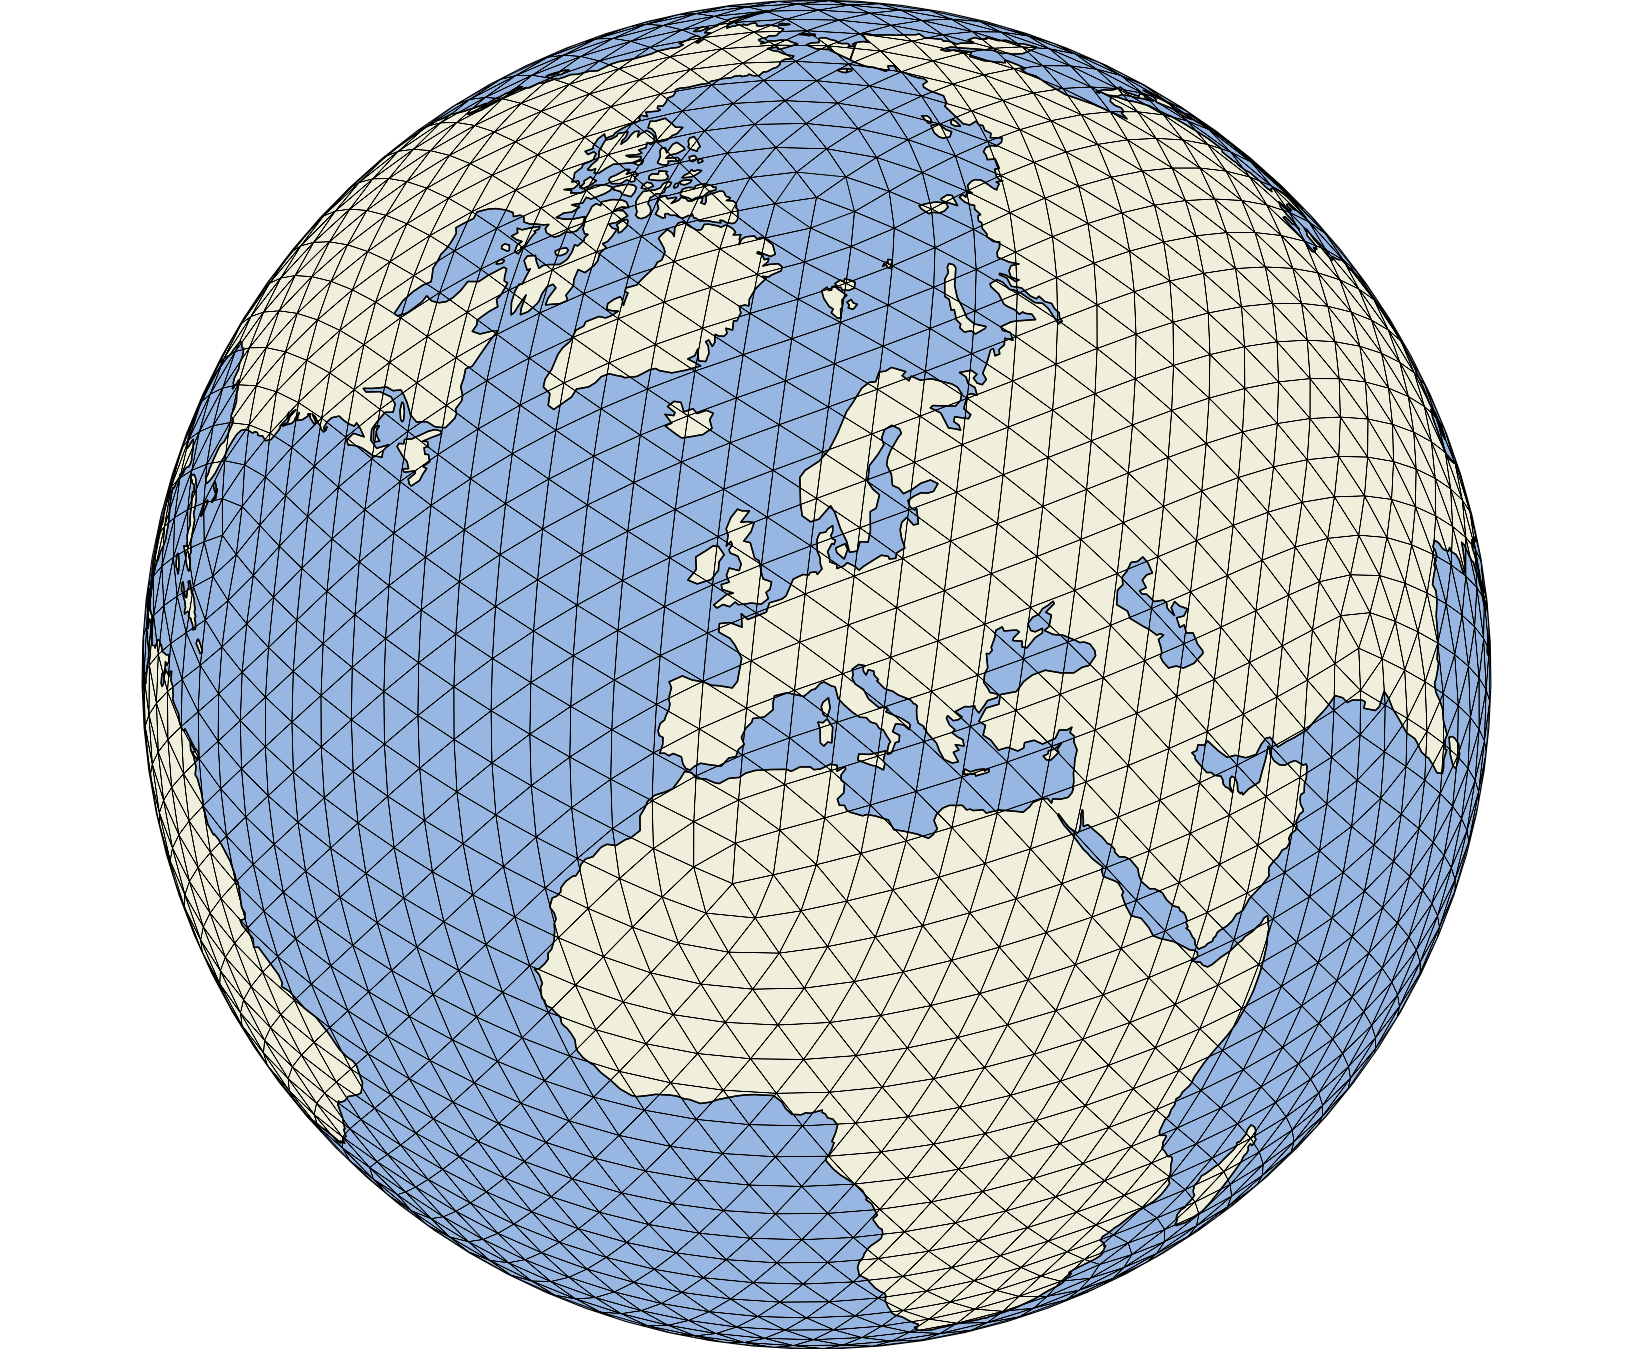

## ICON Grids


<table style="width: 100%;">
    <tr>
        <th style="width: 50%; text-align: center">triangular</th>
        <th style="width: 50%; text-align: center">edge grid</th>
    </tr>
</table>

In [14]:
# courtesy of Ralf Müller, MPI-M
with psy.open_dataset("data/icon.nc") as ds:
    display(ds)

<xarray.Dataset>
Dimensions:    (ncells: 5120, vertices: 3)
Coordinates:
    clon_bnds  (ncells, vertices) float64 ...
    clat_bnds  (ncells, vertices) float64 ...
    clon       (ncells) float64 ...
    clat       (ncells) float64 ...
Dimensions without coordinates: ncells, vertices
Data variables:
    t2m        (ncells) float32 ...

In [15]:
# courtesy of Ralf Müller, MPI-M
with psy.open_dataset("data/icon-edge.nc") as ds:
    display(ds)

<xarray.Dataset>
Dimensions:    (edge: 480, no: 4)
Coordinates:
    elon_bnds  (edge, no) float32 ...
    elat_bnds  (edge, no) float32 ...
    elon       (edge) float32 ...
    elat       (edge) float32 ...
Dimensions without coordinates: edge, no
Data variables:
    t2m_edge   (edge) float32 ...

## Unstructured Grids: UGRID

- ICON style just defines the coordinate `bounds` 
- [UGRID][ugrid] the connectivity of the nodes (vortices)

[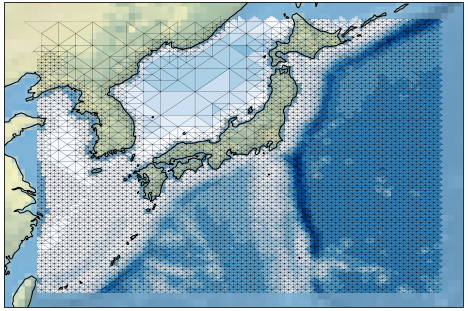][example]
[View the code][example]

[ugrid]: https://ugrid-conventions.github.io/ugrid-conventions/
[example]: https://psyplot.github.io/examples/maps/example_ugrid.html

In [16]:
# courtesy of Stefan Vater, UHH
with psy.open_dataset("data/simple_triangular_grid_si0.nc") as ds:
    display(ds)

<xarray.Dataset>
Dimensions:           (Three: 3, nMesh2_face: 2, nMesh2_node: 4, time: 1)
Coordinates:
    Mesh2             int32 ...
    Mesh2_node_x      (nMesh2_node) float32 ...
    Mesh2_node_y      (nMesh2_node) float32 ...
    Mesh2_face_nodes  (nMesh2_face, Three) int32 ...
  * time              (time) datetime64[ns] 1951-01-01
Dimensions without coordinates: Three, nMesh2_face, nMesh2_node
Data variables:
    Mesh2_ndvar       (time, nMesh2_node) float32 ...
    Mesh2_fcvar       (time, nMesh2_face) float32 ...
Attributes:
    title:              test mesh
    institution:        Universitaet Hamburg
    contact:            None
    source:             None
    references:         None
    comment:            None
    Conventions:        UGRID-0.9
    creation_date:      2015-01-26 09:19:01  01:00
    modification_date:  2015-01-26 09:19:01  01:00

## Triangular grids

In [17]:
psy.plot.mapplot(
    "data/simple_triangular_grid_si0.nc", ax=(1, 2), title="Variable Location: %(location)s", datagrid="r-"
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

psyplot.project.Project([
    arr0: 1-dim DataArray of Mesh2_fcvar, with (nMesh2_face)=(2,), Mesh2=-2147483647, time=1951-01-01,
    arr1: 1-dim DataArray of Mesh2_ndvar, with (nMesh2_node)=(4,), Mesh2=-2147483647, time=1951-01-01])

## Flexible meshes

In [18]:
psy.plot.mapplot(
    "data/simple_flexible_grid_si0.nc", ax=(1, 2), title="Variable Location: %(location)s", datagrid="r-"
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

psyplot.project.Project([
    arr2: 1-dim DataArray of Mesh2_fcvar, with (nMesh2_face)=(2,), Mesh2=-2147483647, time=1951-01-01,
    arr3: 1-dim DataArray of Mesh2_ndvar, with (nMesh2_node)=(5,), Mesh2=-2147483647, time=1951-01-01])

## FESOM vs. UGRID

In [19]:
fesom_data = psy.open_dataset("data/FESOM4-5km-2009-oce-mean-nc.nc")
fesom_data

<xarray.Dataset>
Dimensions:  (T: 12, nodes_2d: 89635, nodes_3d: 2188526)
Dimensions without coordinates: T, nodes_2d, nodes_3d
Data variables:
    time     (T) float64 ...
    temp     (T, nodes_3d) float64 ...
    salt     (T, nodes_3d) float64 ...
    u        (T, nodes_3d) float64 ...
    v        (T, nodes_3d) float64 ...
    w        (T, nodes_3d) float64 ...
    ssh      (T, nodes_2d) float64 ...

In [20]:
fesom_mesh = psy.open_dataset("data/mesh_FESOM4-5km-nc.nc")
fesom_mesh

<xarray.Dataset>
Dimensions:  (nele: 176276, nface: 3, nlayer: 47, node: 89635)
Dimensions without coordinates: nele, nface, nlayer, node
Data variables:
    lon      (node) float64 ...
    lat      (node) float64 ...
    ele      (nele, nface) int32 ...
    layer    (nlayer) int32 ...
    nod32    (node, nlayer) int32 ...
    depth    (node) float64 ...

## Transform FESOM to UGRID

In [21]:
from fesom_to_ugrid import fesom_to_ugrid
ugrid_conform = fesom_to_ugrid(fesom_data, fesom_mesh)
ugrid_conform

<xarray.Dataset>
Dimensions:  (layer: 47, nele: 176276, nface: 3, node: 89635, time: 12)
Coordinates:
  * time     (time) float64 2.678e+06 5.098e+06 ... 2.886e+07 3.154e+07
    lon      (node) float64 -28.73 -28.65 -28.54 -28.47 ... 39.64 39.89 39.4
    lat      (node) float64 72.04 72.09 72.05 72.02 ... 84.51 84.51 84.54 84.55
    ele      (nele, nface) int32 ...
  * layer    (layer) int32 0 10 20 30 40 50 60 ... 4900 5150 5250 5350 5450 5550
    mesh     int64 1
Dimensions without coordinates: nele, nface, node
Data variables:
    temp     (time, layer, node) float64 -1.753 -1.753 -1.751 ... nan nan nan
    salt     (time, layer, node) float64 32.47 32.47 32.47 32.46 ... nan nan nan
    u        (time, layer, node) float64 0.0 0.0 0.0002611 ... nan nan nan
    v        (time, layer, node) float64 0.0 0.0 -3.065e-07 ... nan nan nan
    w        (time, layer, node) float64 3.522e-08 1.594e-07 ... nan nan
    ssh      (time, node) float64 ...
    depth    (node) float64 82.0 86.0 204.0 ... 3.905e+03 3.906e+03 3.908e+03

In [22]:
ugrid_conform.psy.plot.mapplot(
    name="temp", cmap="Reds", projection="ortho", clat=90,
    lsm={"land": "0.8", "ocean": "0.9", "res": "10m", "coast": "k"},
#     datagrid='k-',
)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

psyplot.project.Project([    arr4: 1-dim DataArray of temp, with (node)=(89635,), time=2678400.0, layer=0, mesh=1])

<h2 class="section-heading">Other features of psyplot</h2>

## The GUIs

### psy-view

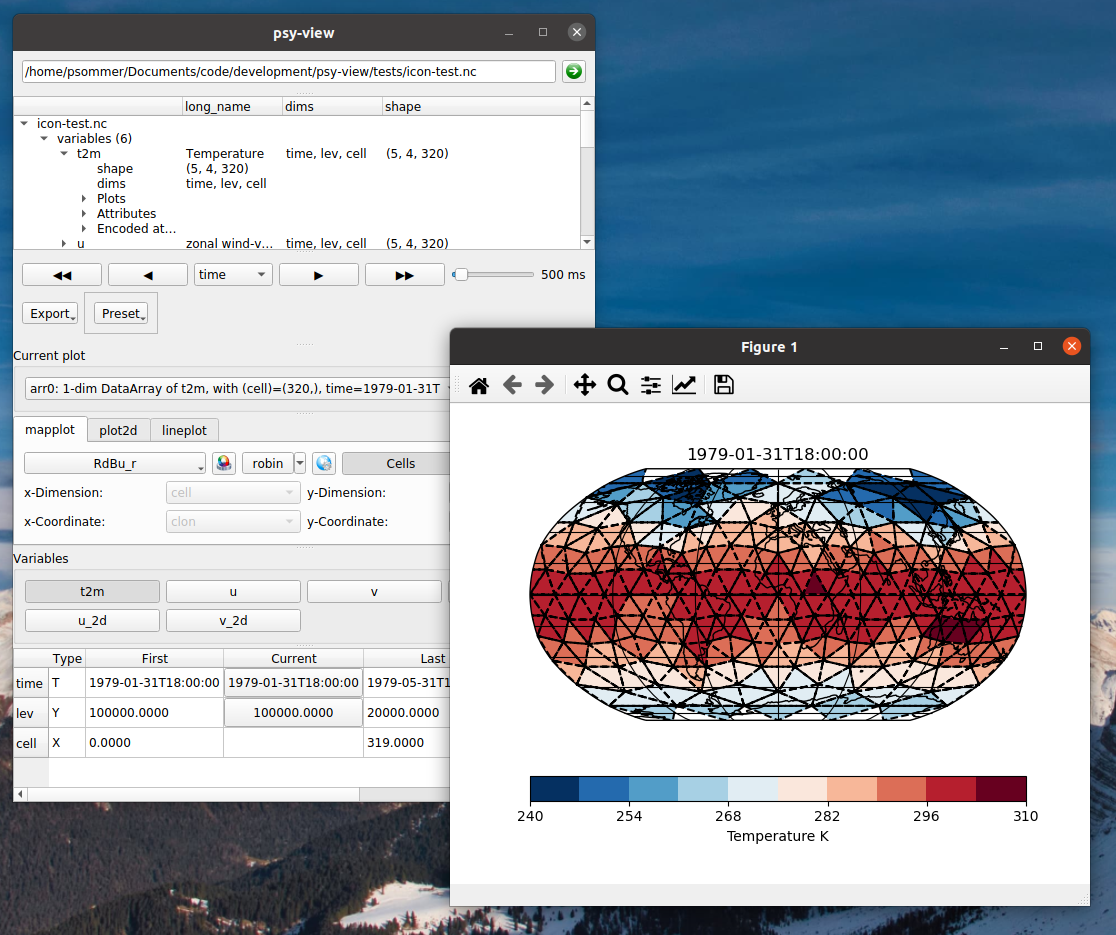

### The psyplot GUI

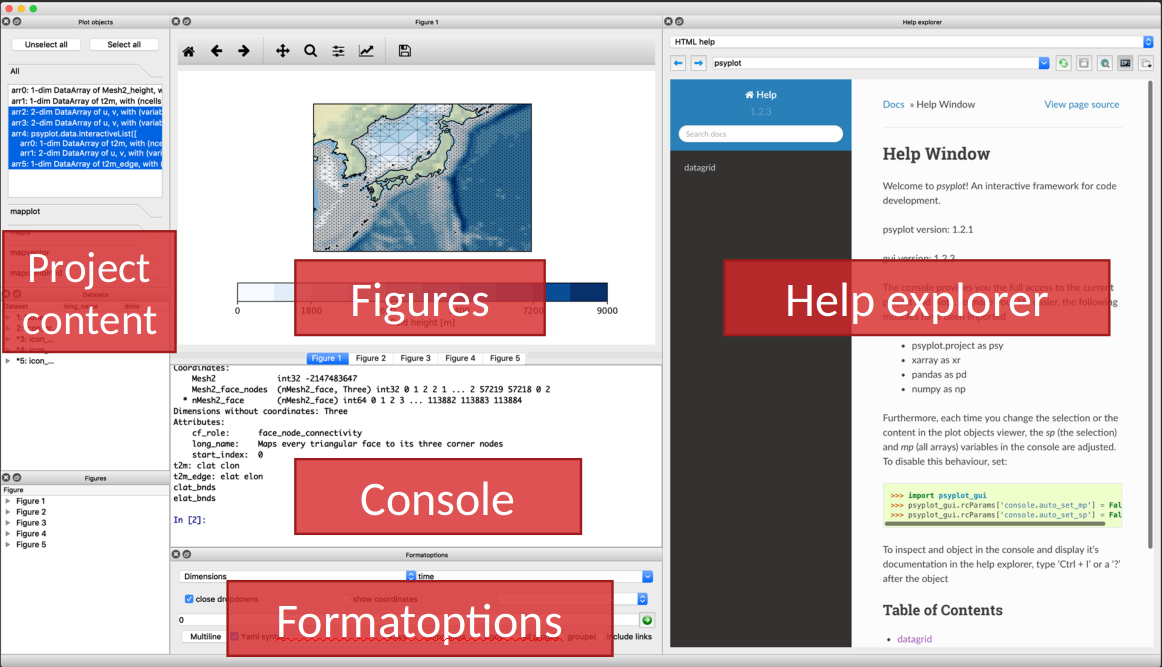

This is what you saw already

## Save and load projects

In [23]:
initial = psy.plot.mapplot('data/demo.nc', name='t2m', title='Initial project')
initial.save_project('my-project.pkl')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
reloaded = psy.Project.load_project('my-project.pkl')
reloaded.update(title='Reloaded project')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Export plots

In [25]:
plt.ioff()

with psy.plot.mapplot('data/demo.nc', name='t2m', time=[0, 1, 2], title='%(time)s') as sp:
    sp.export('data/step-%i.png')

plt.ion()

!ls data/step-?.png

data/step-1.png  data/step-2.png  data/step-3.png


In [26]:
from IPython.display import display, HTML, Image
s = '<table><tr><td><img src="data/step-1.png"></td><td><img src="data/step-2.png"></td><td><img src="data/step-3.png"></td></tr></table>'
display(HTML(s))

## Generate plots from the command line

In [27]:
!echo 'projection: robin' > fmt.yml
!psyplot data/demo.nc -n t2m -pm mapplot -fmt fmt.yml -o data/output.png

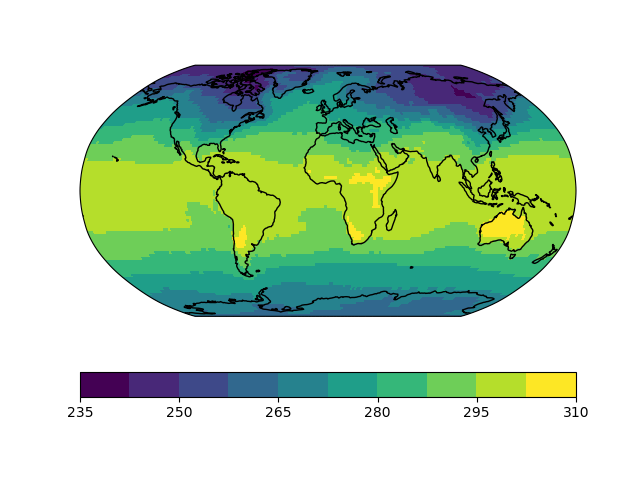

In [28]:
display(Image('data/output.png'))

<h2 class="section-heading">Outlook</h2>

## 3D visualization via matplotlib

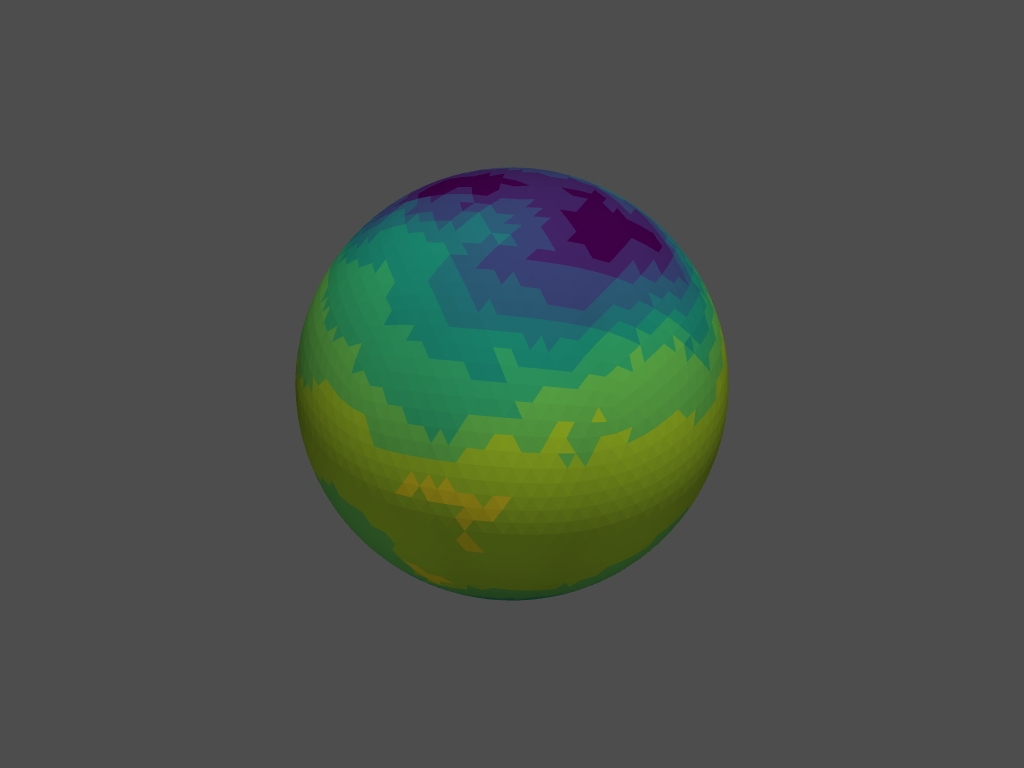

In [29]:
import psy_vtk.plotters as pvtk

ds = psy.open_dataset('data/icon.nc')

globe_plot = pvtk.GlobePlotter(ds.psy.t2m)
disp = globe_plot.ax.show()

pyvista combines the power and efficiency of the (pretty difficult) VTK python bindings with a well-documented interface and matplotlib-like functionalities.

And it can even work with psyplot pretty much out of the box!

In [30]:
globe_plot.update(cmap='Reds')

In [31]:
globe_plot.update(datagrid=True)

## Immediate support of all grids

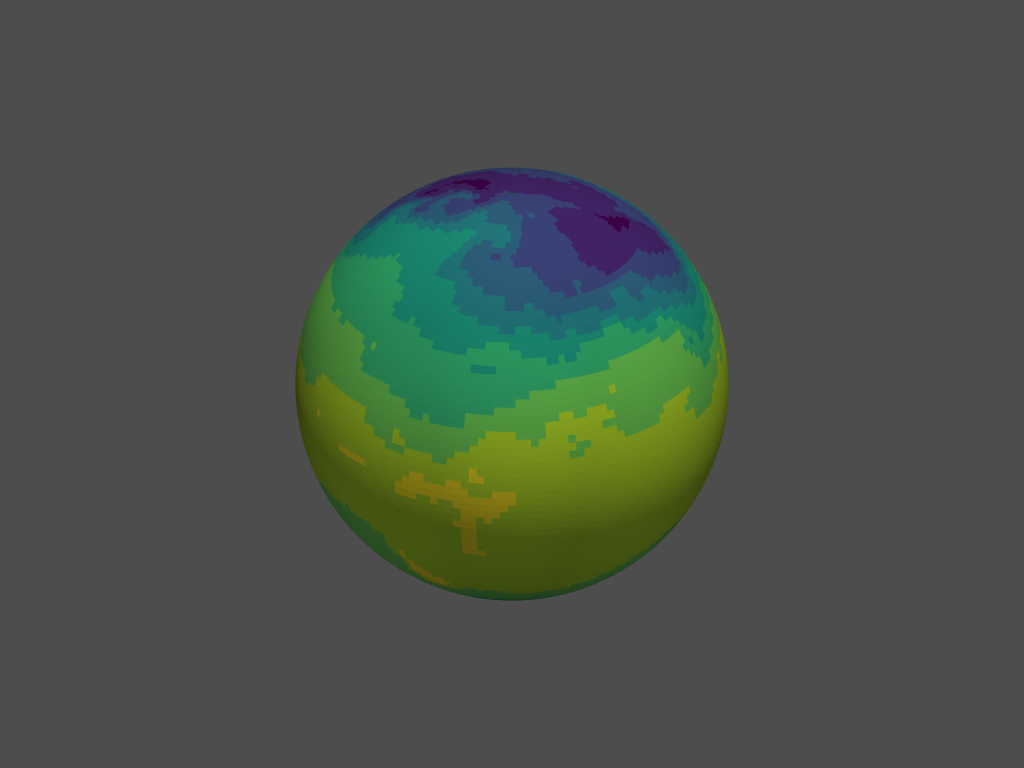

In [32]:
ds = psy.open_dataset('data/rectilinear.nc')

globe_plot = pvtk.GlobePlotter(ds.psy.t2m)
globe_plot.ax.show();

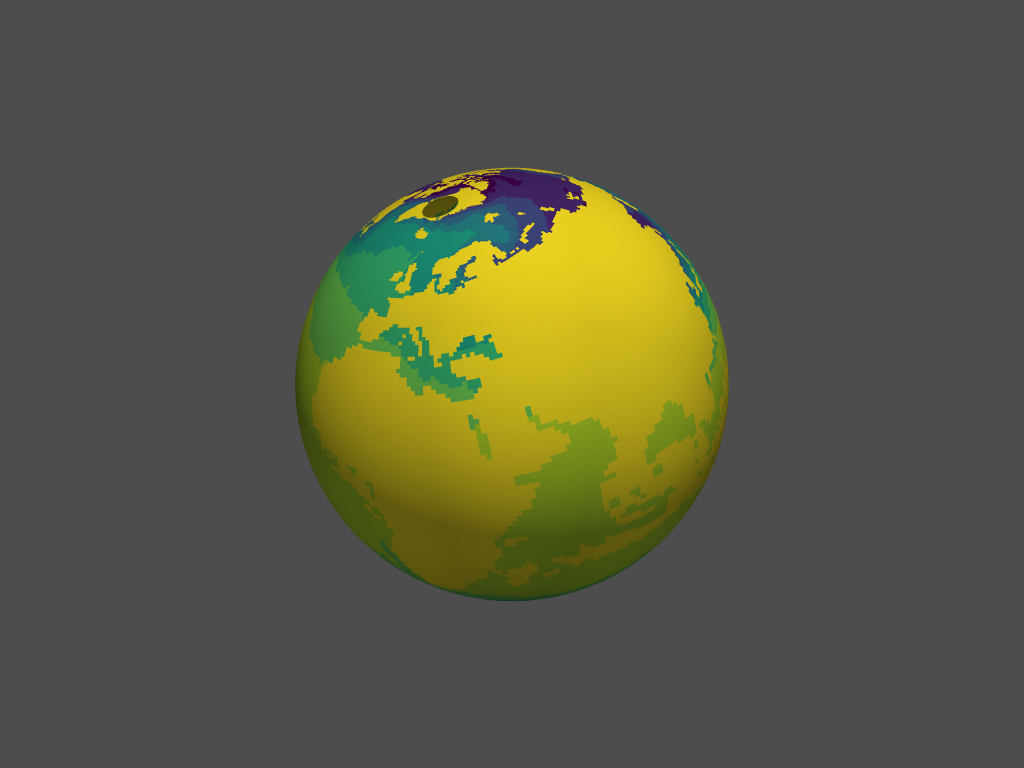

In [33]:
ds = psy.open_dataset('data/curvilinear.nc')

globe_plot = pvtk.GlobePlotter(ds.psy.t2m)
globe_plot.ax.show();

## Visualizing big data

Coming back to our 4.4 million cells:

psy-vtk needs a couple of seconds to visualize it and it works fluently.

Come back to me if you are interested in a collaboration.

In [34]:
Video("data/screencast.mp4", embed=True, html_attributes="autoplay loop")

## Transects

### psy-transect 

- interpolate rastered (or unstructured) data on to a path.
- display vertical profiles (with respect to orography, if available)
- supports vector (wind) or scalar fields (temperature)
- made for interactive usage

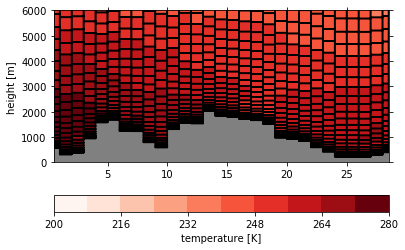

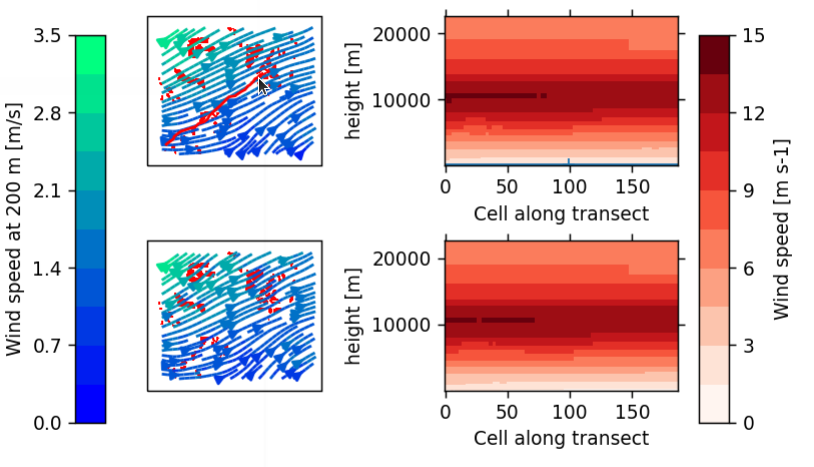

## Summary

### The framework
- the psyplot core for the data model, and plugins for various visualizations
- designed to be flexible and sustainable
- equipped via flexible graphical user interface

### The data model
- based on a netCDF-like infrastructure and interpretes CF- and UGRID conventions
- support for multiple grids: rectilinear, circumpolar and unstructured

**Make sure that your coordinates define bounds and your variables the `grid_mapping`. Just follow the HZG Metadata Guidelines for netCDF files: https://wiki.coast.hzg.de/display/MG**

### Scriptability
- close to the data with a minimum of visualization overhead
- can easily be enhanced by other powerful libraries, such as scipy, scikit-learn, etc.

<h2 class="section-heading">More background:<br>An introduction into the psyplot framework</h2>

## The psyplot data model

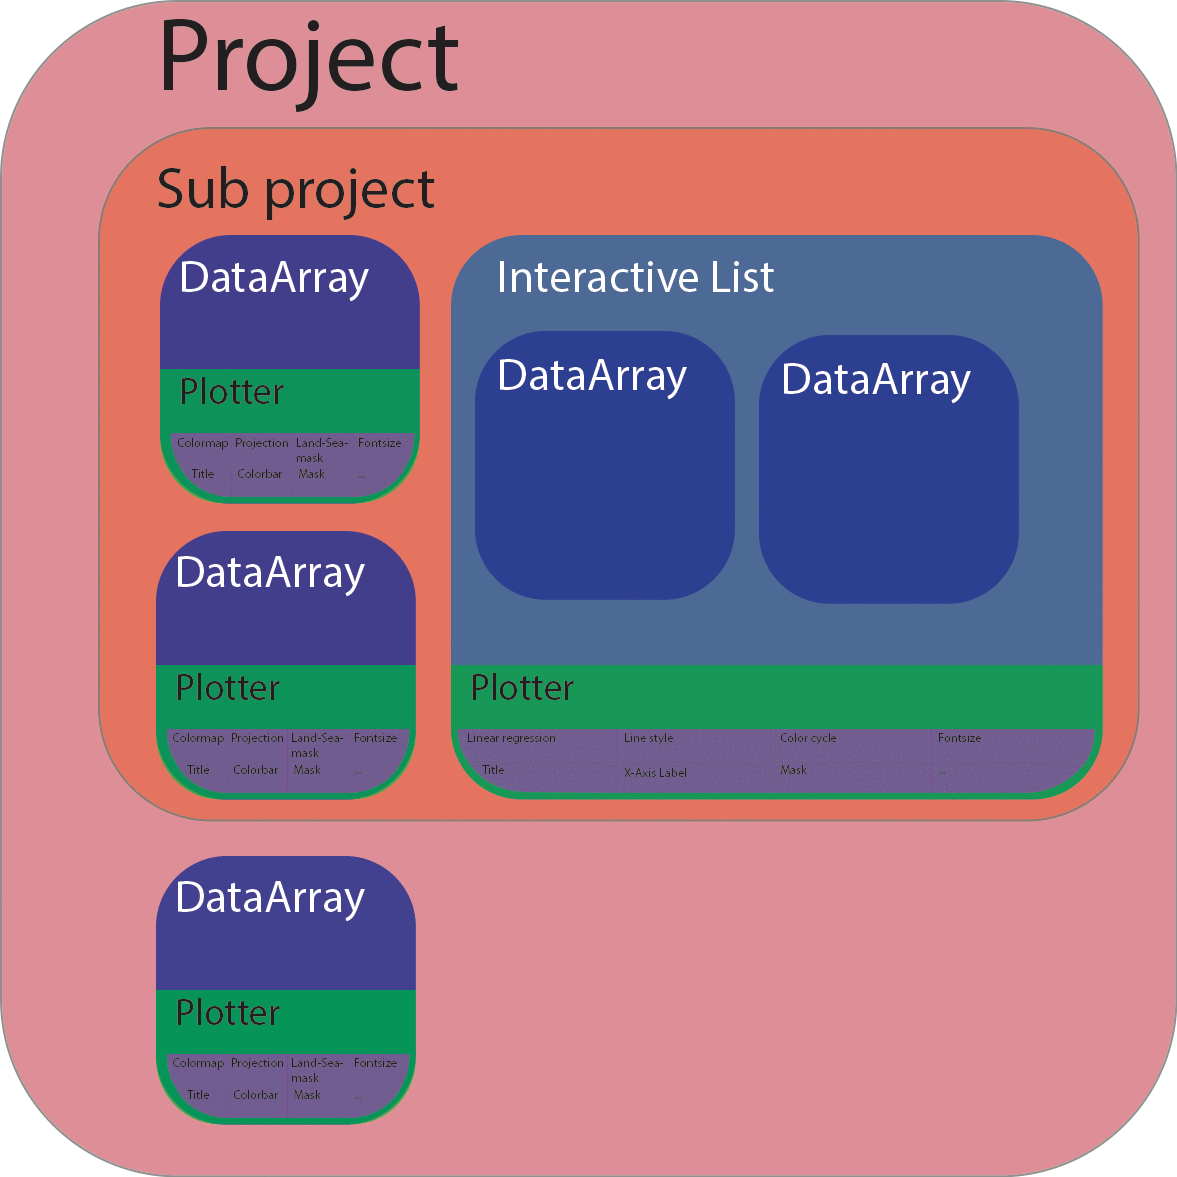

- `Formatoption`: The smallest possible unit. Each formatoption controls one aspect of the plot (cmap, lonlatbox, etc.)
- `Plotter`: A set of formatoptions that visualizes data

- `DataArray`: Standard `xarray`
- `InteractiveList`: A collection of `DataArray`s that are visualized by one plotter (e.g. a collection of lines)

- `Project`: A set of data objects, each visualized by one plotter
- `Sub project`: A subset of a larger `Project`

## The psyplot data model

In [35]:
sp = (           # the subproject 
    psy.plot.mapplot(    # the plot method
        "data/icon_grid_demo.nc",
        name="t2m",      # variable name
        time=0,          # dimension infos
        title="title",   # a formatoption
    )
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [36]:
sp[0]              # the DataArray

<xarray.DataArray 't2m' (ncells: 5120)>
array([268.0231 , 267.82184, 270.76376, ..., 284.9598 , 281.40765, 285.71848],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 1979-01-31T18:00:00
    clon     (ncells) float64 0.6283 0.5623 0.6283 ... 0.1454 0.2085 0.2409
    clat     (ncells) float64 0.9184 0.9399 0.8735 ... -0.7121 -0.7751 -0.7038
    lev      float64 1e+05
  * ncells   (ncells) int64 0 1 2 3 4 5 6 ... 5113 5114 5115 5116 5117 5118 5119
Attributes:
    long_name:                    Temperature
    units:                        K
    code:                         130
    table:                        128
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [37]:
sp[0].psy.plotter  # the plotter

{'levels': None,
 'interp_bounds': None,
 'plot': 'mesh',
 'miss_color': None,
 'background': 'rc',
 'transpose': False,
 'projection': 'cf',
 'transform': 'cf',
 'clon': None,
 'clat': None,
 'lonlatbox': None,
 'lsm': {'res': '110m', 'linewidth': 1.0, 'coast': 'k'},
 'stock_img': False,
 'grid_color': 'k',
 'grid_labels': None,
 'grid_labelsize': 12.0,
 'grid_settings': {},
 'xgrid': False,
 'ygrid': False,
 'map_extent': None,
 'datagrid': None,
 'clip': None,
 'cmap': 'viridis',
 'bounds': [<BoundsMethod.rounded: 'rounded'>, None, 0.0, 100.0, None, None],
 'extend': 'neither',
 'cbar': {'b'},
 'clabel': '',
 'clabelsize': 'medium',
 'clabelweight': None,
 'cbarspacing': 'uniform',
 'clabelprops': {},
 'cticks': None,
 'cticklabels': None,
 'cticksize': 'medium',
 'ctickweight': None,
 'ctickprops': {},
 'mask_datagrid': True,
 'tight': False,
 'maskless': None,
 'maskleq': None,
 'maskgreater': None,
 'maskgeq': None,
 'maskbetween': None,
 'mask': None,
 'title': 'title',
 'titles

## More information?

Watch the DKRZ TechTalk on youtube and view the slides on Github:

https://github.com/Chilipp/psyplot-DKRZ-TechTalk-20201117

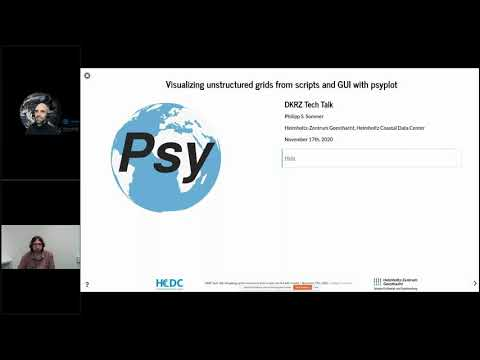

In [38]:
from IPython.display import YouTubeVideo
YouTubeVideo("DYsCQbZbtV0")